In [90]:
#import and print the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
#import dataset
df=pd.read_csv("D:\py my projects\github projects\Videodata (1).csv")
#need to clean the name of columns[remove the spaces]
df.head()
df=data[['age',' workclass',' education',' marital-status',' occupation',' hours-per-week',' native-country',' income']]

# data=data[['age',' workclass',' education',' martial-status',' occupation',' hours-per-week',' native-country',' income']]
# #rewrite the columns
df.columns=[['age','workclass','education','martial-status','occupation','hours-per-week','native-country','income']]
# #find duplicate and drop them

df.drop_duplicates(inplace=True)
df.head()

C:\Users\ravit\AppData\Local\Temp\ipykernel_10256\149926698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,age,workclass,education,martial-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K


In [91]:
#no duplicate fount
df.duplicated().sum()

0

In [92]:
#lets transform the categroical columns to numerical using preproseccing labelencoder

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#How it works, condiser printing the df before encoding
df['workclass'].head()
#we have output in object format



,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private


In [93]:
df['workclass']=labelencoder.fit_transform(df['workclass'])
df['workclass'].head()
#we can see in output that objects are transformed to numbers

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\AppData\Local\Temp\ipykernel_10256\1143320411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=labelencoder.fit_transform(df['workclass'])


,workclass
0,7
1,6
2,4
3,4
4,4


In [94]:
#lets apply encoder for all columns
df['education']=labelencoder.fit_transform(df['education'])
df['martial-status']=labelencoder.fit_transform(df['martial-status'])
df['occupation']=labelencoder.fit_transform(df['occupation'])
df['native-country']=labelencoder.fit_transform(df['native-country'])
df['income']=labelencoder.fit_transform(df['income'])

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\AppData\Local\Temp\ipykernel_10256\1906193624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=labelencoder.fit_transform(df['education'])
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y w

In [95]:
df.head()
#all data converted to numbers

,age,workclass,education,martial-status,occupation,hours-per-week,native-country,income
0,39,7,9,4,1,40,39,0
1,50,6,9,2,4,13,39,0
2,38,4,11,0,6,40,39,0
3,53,4,1,2,6,40,39,0
4,28,4,9,2,10,40,5,0


<Axes: xlabel='None', ylabel='None'>

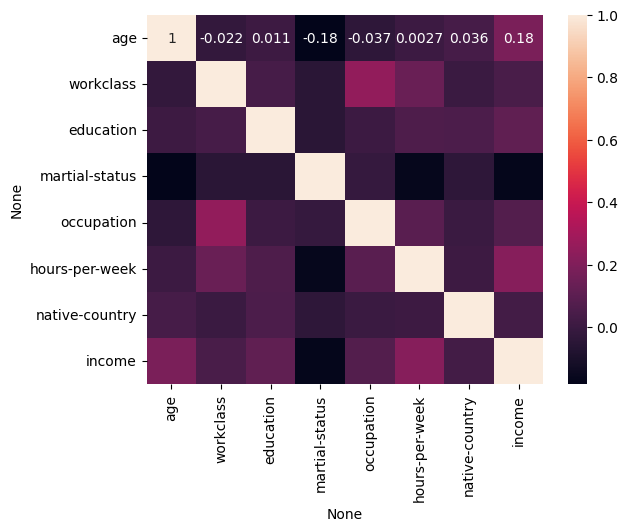

In [96]:
#lets visualize the data in heat map for that we are using here
# sea born model

import seaborn as sns
sns.heatmap(data=df.corr(),annot=True)

In [97]:
#nwo lets set x and y

X=df[['age','workclass','education','martial-status','occupation','hours-per-week','native-country']]

y=df['income']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)

In [98]:
#now start training and testing



In [99]:
#since our x values are in different scale [using fit_transform] we need to scale them

from sklearn.preprocessing import  StandardScaler

scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)


In [100]:
#before starting model training we need to get accuracy score 
from sklearn.metrics import  accuracy_score

def modelresults(predictions):
    print(f'Accuracy score of the model is {accuracy_score(y_test,predictions)}')

In [101]:
#now lets start train model with logistic regression

from sklearn.linear_model import  LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaled_X_train,y_train)

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [102]:
log_prediction=log_model.predict(scaled_X_test)
modelresults(log_prediction)

Accuracy score of the model is 0.7337192474674384


In [104]:
#lets use now KNN 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn= KNeighborsClassifier()
k_values=list(range(1,30))
pipe=Pipeline(steps=[('knn',knn)])
param_grid={"knn__n_neighbors":k_values}
cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(scaled_X_train,y_train)

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [105]:
#prediction
pred_gridknn= cv_classifier.predict(scaled_X_test)
modelresults(pred_gridknn)

Accuracy score of the model is 0.7912116826733324


In [111]:
from sklearn.svm import SVC
svm=SVC()
param_grid_svr={'C':[0.1,0.5,1],"kernel":["linear","rbf","poly"]}
gridsvr=GridSearchCV(svm,param_grid_svr)
gridsvr.fit(scaled_X_train,y_train)

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [114]:
pred_svr=gridsvr.predict(scaled_X_test)
modelresults(pred_svr)

Accuracy score of the model is 0.7870017103012762


In [125]:
#now we run random forest test

from sklearn.ensemble import  RandomForestClassifier
rfr_model=RandomForestClassifier()
n_estimators=[32,64,128]
max_features=[2,3,4,5]
bootstrap=[True,False]
oob_score=[True,False]
param_grid_rfr={"n_estimators":n_estimators,"max_features":max_features,"bootstrap":bootstrap,"oob_score":oob_score}
grid_rfr=GridSearchCV(rfr_model,param_grid_rfr)
grid_rfr.fit(scaled_X_train,y_train)

C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [32, 64, 128],
                         'oob_score': [True, False]})

In [126]:
predsrfc=grid_rfr.predict(scaled_X_test)
modelresults(predsrfc)

Accuracy score of the model is 0.7746349164583607


In [127]:
#new entry
columniterate=1
for index in X.columns:
    mean=df[index].mean()
    print(f"the mean of the column {columniterate} is {mean}")
    columniterate+=1


the mean of the column 1 is 40.22893230708506
the mean of the column 2 is 3.89449378330373
the mean of the column 3 is 10.075350305900928
the mean of the column 4 is 2.5483323465561476
the mean of the column 5 is 6.733096506808763
the mean of the column 6 is 40.92776791000592
the mean of the column 7 is 36.10447996842313


In [128]:
# define new function for prediction

def prediction(newentry):
    pred=cv_classifier.predict(newentry.reshape(1,-1))
    if pred==0:
        return 'Below are equal to 50k'
    else:
        return 'More than 50k'

        

In [129]:
new_index=np.array([[40,3,10,2,6,40,36]])
print('Income prediction of new index is : {}'.format(prediction(new_index)))

Income prediction of new index is : Below are equal to 50k
